In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.10G}'.format

import csv

In [2]:
df = pd.read_csv('./stanford-ner-2018-02-27/train_links/experimento_clasificacion_ links_ 7mb/train_links.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )
df_result = pd.read_csv('./stanford-ner-2018-02-27/train_links/experimento_clasificacion_ links_ 7mb/result_linked.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )
#df = pd.read_csv('./train_links.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )

In [4]:
df.head()

,0,1
0,COMISION,O
1,NACIONAL,O
2,DE,O
3,VALORES,O
4,Resolución,O


In [5]:
df.describe()

,0,1
count,814485,814485
unique,52864,5
top,de,O
freq,65482,809052


In [6]:
df_result.head()

,0,1,2
0,MINISTERIO,O,O
1,DE,O,O
2,MODERNIZACIÓN,O,O
3,OFICINA,O,O
4,NACIONAL,O,O


In [35]:
df_result.describe()

,0,1,2
count,680878,680935,680935
unique,53111,5,5
top,de,O,O
freq,51451,678507,679232


In [7]:
df[1].unique()

array(['O', 'ENTITY', 'DECRETO', 'DECISION', 'INSTRUCCION'], dtype=object)

In [8]:
df_result[1].unique()

array(['O', 'ENTITY', 'DECRETO', 'INSTRUCCION', 'DECISION'], dtype=object)

In [9]:
df_result[2].unique()

array(['O', 'DECRETO', 'ENTITY', 'INSTRUCCION', 'DECISION'], dtype=object)

In [10]:
df_result[(df_result[1] == 'O')].count()

0    807432
1    807432
2    807432
dtype: int64

In [11]:
df_result[(df_result[1] == 'O') & (df_result[2] != 'O')].count()

0    3359
1    3359
2    3359
dtype: int64

In [12]:
df_O_error = df_result[(df_result[1] == 'O') & (df_result[2] != 'O')]

In [13]:
len(df_O_error)

3359

#### DE  3359 a los que les asignó una clase y eran '0' solo 5 estaban mal y eran NaN

206038  Decreto  O  DECRETO


In [15]:
print(df_result.loc[[206035]])        
print(df_result.loc[[206036]])        
print(df_result.loc[[206037]])        
print(df_result.loc[[206038]])        
print(df_result.loc[[206039]]) 
print(df_result.loc[[206040]]) 

               0  1  2
206035  756/2004  O  O
              0        1        2
206036  Decreto  DECRETO  DECRETO
                 0        1        2
206037  N°756/2004  DECRETO  DECRETO
              0  1        2
206038  Decreto  O  DECRETO
          0  1  2
206039  Ley  O  O
               0  1  2
206040  9.276/56  O  O


In [14]:
i = 0 
for index in df_O_error.index.values:
    print('---------------------------')
    print(df_result.loc[[index]])        
    print(df_result.loc[[index+1]])        
    print(df_result.loc[[index+2]]) 
    print('---------------------------')
    

---------------------------
                0  1       2
80711  Resolución  O  ENTITY
        0  1       2
80712  N°  O  ENTITY
               0  1       2
80713  1941/2005  O  ENTITY
---------------------------
---------------------------
        0  1       2
80712  N°  O  ENTITY
               0  1       2
80713  1941/2005  O  ENTITY
                0       1       2
80714  Resolución  ENTITY  ENTITY
---------------------------
---------------------------
               0  1       2
80713  1941/2005  O  ENTITY
                0       1       2
80714  Resolución  ENTITY  ENTITY
             0       1       2
80715  General  ENTITY  ENTITY
---------------------------
---------------------------
            0  1       2
172450  "Esta  O  ENTITY
            0  1       2
172451  norma  O  ENTITY
         0  1       2
172452  es  O  ENTITY
---------------------------
---------------------------
            0  1       2
172451  norma  O  ENTITY
         0  1       2
172452  es  O  ENTITY
  

414399  Conjunta  O  ENTITY
         0  1       2
414400  N°  O  ENTITY
               0  1       2
414401  392/2014  O  ENTITY
---------------------------
---------------------------
         0  1       2
414400  N°  O  ENTITY
               0  1       2
414401  392/2014  O  ENTITY
        0  1       2
414402  y  O  ENTITY
---------------------------
---------------------------
               0  1       2
414401  392/2014  O  ENTITY
        0  1       2
414402  y  O  ENTITY
         0  1  2
414403  N°  O  O
---------------------------
---------------------------
        0  1       2
414402  y  O  ENTITY
         0  1  2
414403  N°  O  O
                0  1  2
414404  108/2014.  O  O
---------------------------
---------------------------
                 0  1       2
437023  Resolución  O  ENTITY
               0  1       2
437024  Conjunta  O  ENTITY
              0  1       2
437025  General  O  ENTITY
---------------------------
---------------------------
               0  1     

679100  16/2007  O  ENTITY
                  0  1       2
679101  Disposición  O  ENTITY
---------------------------
---------------------------
              0  1       2
679100  16/2007  O  ENTITY
                  0  1       2
679101  Disposición  O  ENTITY
         0  1       2
679102  N°  O  ENTITY
---------------------------
---------------------------
                  0  1       2
679101  Disposición  O  ENTITY
         0  1       2
679102  N°  O  ENTITY
             0  1       2
679103  4/2017  O  ENTITY
---------------------------
---------------------------
         0  1       2
679102  N°  O  ENTITY
             0  1       2
679103  4/2017  O  ENTITY
                  0  1       2
679104  Disposición  O  ENTITY
---------------------------
---------------------------
             0  1       2
679103  4/2017  O  ENTITY
                  0  1       2
679104  Disposición  O  ENTITY
         0  1       2
679105  N°  O  ENTITY
---------------------------
-------------------------

679162  N°  O  ENTITY
             0  1       2
679163  3/2013  O  ENTITY
                  0  1       2
679164  Disposición  O  ENTITY
---------------------------
---------------------------
             0  1       2
679163  3/2013  O  ENTITY
                  0  1       2
679164  Disposición  O  ENTITY
         0  1       2
679165  N°  O  ENTITY
---------------------------
---------------------------
                  0  1       2
679164  Disposición  O  ENTITY
         0  1       2
679165  N°  O  ENTITY
             0  1       2
679166  3/2013  O  ENTITY
---------------------------
---------------------------
         0  1       2
679165  N°  O  ENTITY
             0  1       2
679166  3/2013  O  ENTITY
                  0  1       2
679167  Disposición  O  ENTITY
---------------------------
---------------------------
             0  1       2
679166  3/2013  O  ENTITY
                  0  1       2
679167  Disposición  O  ENTITY
         0  1       2
679168  N°  O  ENTITY
--------

                 0  1       2
755070  2615.10.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755069  2615.10.20  O  ENTITY
                 0  1       2
755070  2615.10.90  O  ENTITY
                 0  1       2
755071  2615.90.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755070  2615.10.90  O  ENTITY
                 0  1       2
755071  2615.90.00  O  ENTITY
                 0  1       2
755072  2616.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755071  2615.90.00  O  ENTITY
                 0  1       2
755072  2616.10.00  O  ENTITY
                 0  1       2
755073  2617.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755072  2616.10.00  O  ENTITY
                 0  1       2
755073  2617.10.00  O  ENTITY
                 0  1       2
755074  2617.90.00  O  ENT

                 0  1       2
755107  2812.10.12  O  ENTITY
                 0  1       2
755108  2812.10.13  O  ENTITY
                 0  1       2
755109  2812.10.14  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755108  2812.10.13  O  ENTITY
                 0  1       2
755109  2812.10.14  O  ENTITY
                 0  1       2
755110  2812.10.15  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755109  2812.10.14  O  ENTITY
                 0  1       2
755110  2812.10.15  O  ENTITY
                 0  1       2
755111  2812.10.19  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755110  2812.10.15  O  ENTITY
                 0  1       2
755111  2812.10.19  O  ENTITY
                 0  1       2
755112  2812.10.21  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755111  2812.10.19  O  ENT

755151  2827.39.91  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755150  2827.39.70  O  ENTITY
                 0  1       2
755151  2827.39.91  O  ENTITY
                 0  1       2
755152  2827.39.92  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755151  2827.39.91  O  ENTITY
                 0  1       2
755152  2827.39.92  O  ENTITY
                 0  1       2
755153  2827.39.93  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755152  2827.39.92  O  ENTITY
                 0  1       2
755153  2827.39.93  O  ENTITY
                 0  1       2
755154  2827.39.94  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755153  2827.39.93  O  ENTITY
                 0  1       2
755154  2827.39.94  O  ENTITY
                 0  1       2
755155  2827.39.95  O  ENTITY
--------------------------

                 0  1       2
755199  2835.29.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755198  2835.29.10  O  ENTITY
                 0  1       2
755199  2835.29.20  O  ENTITY
                 0  1       2
755200  2835.29.30  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755199  2835.29.20  O  ENTITY
                 0  1       2
755200  2835.29.30  O  ENTITY
                 0  1       2
755201  2835.29.40  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755200  2835.29.30  O  ENTITY
                 0  1       2
755201  2835.29.40  O  ENTITY
                 0  1       2
755202  2835.29.50  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755201  2835.29.40  O  ENTITY
                 0  1       2
755202  2835.29.50  O  ENTITY
                 0  1       2
755203  2835.29.60  O  ENT

                 0  1       2
755241  2841.90.30  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755240  2841.90.29  O  ENTITY
                 0  1       2
755241  2841.90.30  O  ENTITY
                 0  1       2
755242  2841.90.49  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755241  2841.90.30  O  ENTITY
                 0  1       2
755242  2841.90.49  O  ENTITY
                 0  1       2
755243  2841.90.50  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755242  2841.90.49  O  ENTITY
                 0  1       2
755243  2841.90.50  O  ENTITY
                 0  1       2
755244  2841.90.60  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755243  2841.90.50  O  ENTITY
                 0  1       2
755244  2841.90.60  O  ENTITY
                 0  1       2
755245  2841.90.70  O  ENT

                 0  1       2
755278  2901.22.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755277  2901.21.00  O  ENTITY
                 0  1       2
755278  2901.22.00  O  ENTITY
                 0  1       2
755279  2901.23.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755278  2901.22.00  O  ENTITY
                 0  1       2
755279  2901.23.00  O  ENTITY
                 0  1       2
755280  2901.24.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755279  2901.23.00  O  ENTITY
                 0  1       2
755280  2901.24.10  O  ENTITY
                 0  1       2
755281  2901.24.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755280  2901.24.10  O  ENTITY
                 0  1       2
755281  2901.24.20  O  ENTITY
                 0  1       2
755282  2901.29.00  O  ENT

                 0  1       2
755331  2903.59.90  O  ENTITY
                 0  1       2
755332  2903.62.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755331  2903.59.90  O  ENTITY
                 0  1       2
755332  2903.62.20  O  ENTITY
                 0  1       2
755333  2903.69.12  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755332  2903.62.20  O  ENTITY
                 0  1       2
755333  2903.69.12  O  ENTITY
                 0  1       2
755334  2903.69.13  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755333  2903.69.12  O  ENTITY
                 0  1       2
755334  2903.69.13  O  ENTITY
                 0  1       2
755335  2903.69.19  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755334  2903.69.13  O  ENTITY
                 0  1       2
755335  2903.69.19  O  ENT

                 0  1       2
755413  2909.30.12  O  ENTITY
                 0  1       2
755414  2909.30.19  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755413  2909.30.12  O  ENTITY
                 0  1       2
755414  2909.30.19  O  ENTITY
                 0  1       2
755415  2909.30.21  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755414  2909.30.19  O  ENTITY
                 0  1       2
755415  2909.30.21  O  ENTITY
                 0  1       2
755416  2909.30.29  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755415  2909.30.21  O  ENTITY
                 0  1       2
755416  2909.30.29  O  ENTITY
                 0  1       2
755417  2909.41.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755416  2909.30.29  O  ENTITY
                 0  1       2
755417  2909.41.00  O  ENT

755456  2913.00.10  O  ENTITY
                 0  1       2
755457  2913.00.90  O  ENTITY
                 0  1       2
755458  2914.19.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755457  2913.00.90  O  ENTITY
                 0  1       2
755458  2914.19.10  O  ENTITY
                 0  1       2
755459  2914.19.21  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755458  2914.19.10  O  ENTITY
                 0  1       2
755459  2914.19.21  O  ENTITY
                 0  1       2
755460  2914.19.22  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755459  2914.19.21  O  ENTITY
                 0  1       2
755460  2914.19.22  O  ENTITY
                 0  1       2
755461  2914.19.30  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755460  2914.19.22  O  ENTITY
                 0  1     

                 0  1       2
755514  2915.90.39  O  ENTITY
                 0  1       2
755515  2915.90.41  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755514  2915.90.39  O  ENTITY
                 0  1       2
755515  2915.90.41  O  ENTITY
                 0  1       2
755516  2915.90.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755515  2915.90.41  O  ENTITY
                 0  1       2
755516  2915.90.90  O  ENTITY
                 0  1       2
755517  2916.11.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755516  2915.90.90  O  ENTITY
                 0  1       2
755517  2916.11.10  O  ENTITY
                 0  1       2
755518  2916.11.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755517  2916.11.10  O  ENTITY
                 0  1       2
755518  2916.11.20  O  ENT

                 0  1       2
755566  2918.13.20  O  ENTITY
                 0  1       2
755567  2918.14.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755566  2918.13.20  O  ENTITY
                 0  1       2
755567  2918.14.00  O  ENTITY
                 0  1       2
755568  2918.15.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755567  2918.14.00  O  ENTITY
                 0  1       2
755568  2918.15.00  O  ENTITY
                 0  1       2
755569  2918.19.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755568  2918.15.00  O  ENTITY
                 0  1       2
755569  2918.19.10  O  ENTITY
                 0  1       2
755570  2918.19.21  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755569  2918.19.10  O  ENTITY
                 0  1       2
755570  2918.19.21  O  ENT

                 0  1       2
755629  2921.11.39  O  ENTITY
                 0  1       2
755630  2921.12.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755629  2921.11.39  O  ENTITY
                 0  1       2
755630  2921.12.20  O  ENTITY
                 0  1       2
755631  2921.19.13  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755630  2921.12.20  O  ENTITY
                 0  1       2
755631  2921.19.13  O  ENTITY
                 0  1       2
755632  2921.19.14  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755631  2921.19.13  O  ENTITY
                 0  1       2
755632  2921.19.14  O  ENTITY
                 0  1       2
755633  2921.19.19  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755632  2921.19.14  O  ENTITY
                 0  1       2
755633  2921.19.19  O  ENT

755682  2921.51.39  O  ENTITY
                 0  1       2
755683  2921.51.90  O  ENTITY
                 0  1       2
755684  2921.59.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755683  2921.51.90  O  ENTITY
                 0  1       2
755684  2921.59.11  O  ENTITY
                 0  1       2
755685  2921.59.19  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755684  2921.59.11  O  ENTITY
                 0  1       2
755685  2921.59.19  O  ENTITY
                 0  1       2
755686  2921.59.29  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755685  2921.59.19  O  ENTITY
                 0  1       2
755686  2921.59.29  O  ENTITY
                 0  1       2
755687  2921.59.32  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755686  2921.59.29  O  ENTITY
                 0  1     

                 0  1       2
755740  2922.49.61  O  ENTITY
                 0  1       2
755741  2922.49.62  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755740  2922.49.61  O  ENTITY
                 0  1       2
755741  2922.49.62  O  ENTITY
                 0  1       2
755742  2922.49.63  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755741  2922.49.62  O  ENTITY
                 0  1       2
755742  2922.49.63  O  ENTITY
                 0  1       2
755743  2922.49.69  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755742  2922.49.63  O  ENTITY
                 0  1       2
755743  2922.49.69  O  ENTITY
                 0  1       2
755744  2922.49.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755743  2922.49.69  O  ENTITY
                 0  1       2
755744  2922.49.90  O  ENT

755798  2924.29.99  O  ENTITY
                 0  1       2
755799  2925.12.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755798  2924.29.99  O  ENTITY
                 0  1       2
755799  2925.12.00  O  ENTITY
                 0  1       2
755800  2925.19.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755799  2925.12.00  O  ENTITY
                 0  1       2
755800  2925.19.10  O  ENTITY
                 0  1       2
755801  2925.19.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755800  2925.19.10  O  ENTITY
                 0  1       2
755801  2925.19.90  O  ENTITY
                 0  1       2
755802  2925.20.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755801  2925.19.90  O  ENTITY
                 0  1       2
755802  2925.20.11  O  ENTITY
                 0  1     

755859  2930.90.14  O  ENTITY
                 0  1       2
755860  2930.90.19  O  ENTITY
                 0  1       2
755861  2930.90.21  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755860  2930.90.19  O  ENTITY
                 0  1       2
755861  2930.90.21  O  ENTITY
                 0  1       2
755862  2930.90.22  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755861  2930.90.21  O  ENTITY
                 0  1       2
755862  2930.90.22  O  ENTITY
                 0  1       2
755863  2930.90.23  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755862  2930.90.22  O  ENTITY
                 0  1       2
755863  2930.90.23  O  ENTITY
                 0  1       2
755864  2930.90.29  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755863  2930.90.23  O  ENTITY
                 0  1     

755925  2932.29.20  O  ENTITY
                 0  1       2
755926  2932.29.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755925  2932.29.20  O  ENTITY
                 0  1       2
755926  2932.29.90  O  ENTITY
                 0  1       2
755927  2932.92.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755926  2932.29.90  O  ENTITY
                 0  1       2
755927  2932.92.00  O  ENTITY
                 0  1       2
755928  2932.93.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755927  2932.92.00  O  ENTITY
                 0  1       2
755928  2932.93.00  O  ENTITY
                 0  1       2
755929  2932.95.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755928  2932.93.00  O  ENTITY
                 0  1       2
755929  2932.95.00  O  ENTITY
                 0  1     

755988  2933.33.72  O  ENTITY
                 0  1       2
755989  2933.33.79  O  ENTITY
                 0  1       2
755990  2933.33.81  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755989  2933.33.79  O  ENTITY
                 0  1       2
755990  2933.33.81  O  ENTITY
                 0  1       2
755991  2933.33.82  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755990  2933.33.81  O  ENTITY
                 0  1       2
755991  2933.33.82  O  ENTITY
                 0  1       2
755992  2933.33.83  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755991  2933.33.82  O  ENTITY
                 0  1       2
755992  2933.33.83  O  ENTITY
                 0  1       2
755993  2933.33.84  O  ENTITY
---------------------------
---------------------------
                 0  1       2
755992  2933.33.83  O  ENTITY
                 0  1     

756054  2933.55.10  O  ENTITY
                 0  1       2
756055  2933.55.20  O  ENTITY
                 0  1       2
756056  2933.55.30  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756055  2933.55.20  O  ENTITY
                 0  1       2
756056  2933.55.30  O  ENTITY
                 0  1       2
756057  2933.55.40  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756056  2933.55.30  O  ENTITY
                 0  1       2
756057  2933.55.40  O  ENTITY
                 0  1       2
756058  2933.59.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756057  2933.55.40  O  ENTITY
                 0  1       2
756058  2933.59.11  O  ENTITY
                 0  1       2
756059  2933.59.12  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756058  2933.59.11  O  ENTITY
                 0  1     

756110  2933.91.33  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756109  2933.91.32  O  ENTITY
                 0  1       2
756110  2933.91.33  O  ENTITY
                 0  1       2
756111  2933.91.34  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756110  2933.91.33  O  ENTITY
                 0  1       2
756111  2933.91.34  O  ENTITY
                 0  1       2
756112  2933.91.39  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756111  2933.91.34  O  ENTITY
                 0  1       2
756112  2933.91.39  O  ENTITY
                 0  1       2
756113  2933.91.41  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756112  2933.91.39  O  ENTITY
                 0  1       2
756113  2933.91.41  O  ENTITY
                 0  1       2
756114  2933.91.42  O  ENTITY
--------------------------

                 0  1       2
756171  2934.10.90  O  ENTITY
                 0  1       2
756172  2934.20.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756171  2934.10.90  O  ENTITY
                 0  1       2
756172  2934.20.90  O  ENTITY
                 0  1       2
756173  2934.30.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756172  2934.20.90  O  ENTITY
                 0  1       2
756173  2934.30.10  O  ENTITY
                 0  1       2
756174  2934.30.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756173  2934.30.10  O  ENTITY
                 0  1       2
756174  2934.30.20  O  ENTITY
                 0  1       2
756175  2934.30.30  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756174  2934.30.20  O  ENTITY
                 0  1       2
756175  2934.30.30  O  ENT

                 0  1       2
756232  2935.00.23  O  ENTITY
                 0  1       2
756233  2935.00.24  O  ENTITY
                 0  1       2
756234  2935.00.25  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756233  2935.00.24  O  ENTITY
                 0  1       2
756234  2935.00.25  O  ENTITY
                 0  1       2
756235  2935.00.29  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756234  2935.00.25  O  ENTITY
                 0  1       2
756235  2935.00.29  O  ENTITY
                 0  1       2
756236  2935.00.91  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756235  2935.00.29  O  ENTITY
                 0  1       2
756236  2935.00.91  O  ENTITY
                 0  1       2
756237  2935.00.92  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756236  2935.00.91  O  ENT

756296  2937.22.10  O  ENTITY
                 0  1       2
756297  2937.22.21  O  ENTITY
                 0  1       2
756298  2937.22.29  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756297  2937.22.21  O  ENTITY
                 0  1       2
756298  2937.22.29  O  ENTITY
                 0  1       2
756299  2937.22.31  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756298  2937.22.29  O  ENTITY
                 0  1       2
756299  2937.22.31  O  ENTITY
                 0  1       2
756300  2937.22.39  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756299  2937.22.31  O  ENTITY
                 0  1       2
756300  2937.22.39  O  ENTITY
                 0  1       2
756301  2937.22.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756300  2937.22.39  O  ENTITY
                 0  1     

                 0  1       2
756361  2939.41.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756360  2939.30.20  O  ENTITY
                 0  1       2
756361  2939.41.00  O  ENTITY
                 0  1       2
756362  2939.42.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756361  2939.41.00  O  ENTITY
                 0  1       2
756362  2939.42.00  O  ENTITY
                 0  1       2
756363  2939.43.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756362  2939.42.00  O  ENTITY
                 0  1       2
756363  2939.43.00  O  ENTITY
                 0  1       2
756364  2939.49.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756363  2939.43.00  O  ENTITY
                 0  1       2
756364  2939.49.00  O  ENTITY
                 0  1       2
756365  2939.51.00  O  ENT

                 0  1       2
756419  2941.20.10  O  ENTITY
                 0  1       2
756420  2941.20.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756419  2941.20.10  O  ENTITY
                 0  1       2
756420  2941.20.90  O  ENTITY
                 0  1       2
756421  2941.30.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756420  2941.20.90  O  ENTITY
                 0  1       2
756421  2941.30.10  O  ENTITY
                 0  1       2
756422  2941.30.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756421  2941.30.10  O  ENTITY
                 0  1       2
756422  2941.30.20  O  ENTITY
                 0  1       2
756423  2941.30.31  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756422  2941.30.20  O  ENTITY
                 0  1       2
756423  2941.30.31  O  ENT

756481  3002.10.16  O  ENTITY
                 0  1       2
756482  3002.10.19  O  ENTITY
                 0  1       2
756483  3002.10.22  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756482  3002.10.19  O  ENTITY
                 0  1       2
756483  3002.10.22  O  ENTITY
                 0  1       2
756484  3002.10.23  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756483  3002.10.22  O  ENTITY
                 0  1       2
756484  3002.10.23  O  ENTITY
                 0  1       2
756485  3002.10.24  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756484  3002.10.23  O  ENTITY
                 0  1       2
756485  3002.10.24  O  ENTITY
                 0  1       2
756486  3002.10.29  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756485  3002.10.24  O  ENTITY
                 0  1     

756543  3003.20.32  O  ENTITY
                 0  1       2
756544  3003.20.39  O  ENTITY
                 0  1       2
756545  3003.20.41  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756544  3003.20.39  O  ENTITY
                 0  1       2
756545  3003.20.41  O  ENTITY
                 0  1       2
756546  3003.20.49  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756545  3003.20.41  O  ENTITY
                 0  1       2
756546  3003.20.49  O  ENTITY
                 0  1       2
756547  3003.20.51  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756546  3003.20.49  O  ENTITY
                 0  1       2
756547  3003.20.51  O  ENTITY
                 0  1       2
756548  3003.20.52  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756547  3003.20.51  O  ENTITY
                 0  1     

756608  3003.90.22  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756607  3003.90.21  O  ENTITY
                 0  1       2
756608  3003.90.22  O  ENTITY
                 0  1       2
756609  3003.90.23  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756608  3003.90.22  O  ENTITY
                 0  1       2
756609  3003.90.23  O  ENTITY
                 0  1       2
756610  3003.90.29  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756609  3003.90.23  O  ENTITY
                 0  1       2
756610  3003.90.29  O  ENTITY
                 0  1       2
756611  3003.90.31  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756610  3003.90.29  O  ENTITY
                 0  1       2
756611  3003.90.31  O  ENTITY
                 0  1       2
756612  3003.90.32  O  ENTITY
--------------------------

                 0  1       2
756671  3004.10.13  O  ENTITY
                 0  1       2
756672  3004.10.14  O  ENTITY
                 0  1       2
756673  3004.10.15  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756672  3004.10.14  O  ENTITY
                 0  1       2
756673  3004.10.15  O  ENTITY
                 0  1       2
756674  3004.10.19  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756673  3004.10.15  O  ENTITY
                 0  1       2
756674  3004.10.19  O  ENTITY
                 0  1       2
756675  3004.10.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756674  3004.10.19  O  ENTITY
                 0  1       2
756675  3004.10.20  O  ENTITY
                 0  1       2
756676  3004.20.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756675  3004.10.20  O  ENT

756736  3004.40.20  O  ENTITY
                 0  1       2
756737  3004.40.30  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756736  3004.40.20  O  ENTITY
                 0  1       2
756737  3004.40.30  O  ENTITY
                 0  1       2
756738  3004.40.40  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756737  3004.40.30  O  ENTITY
                 0  1       2
756738  3004.40.40  O  ENTITY
                 0  1       2
756739  3004.40.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756738  3004.40.40  O  ENTITY
                 0  1       2
756739  3004.40.90  O  ENTITY
                 0  1       2
756740  3004.50.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756739  3004.40.90  O  ENTITY
                 0  1       2
756740  3004.50.10  O  ENTITY
                 0  1     

756798  3004.90.75  O  ENTITY
                 0  1       2
756799  3004.90.76  O  ENTITY
                 0  1       2
756800  3004.90.77  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756799  3004.90.76  O  ENTITY
                 0  1       2
756800  3004.90.77  O  ENTITY
                 0  1       2
756801  3004.90.78  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756800  3004.90.77  O  ENTITY
                 0  1       2
756801  3004.90.78  O  ENTITY
                 0  1       2
756802  3004.90.79  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756801  3004.90.78  O  ENTITY
                 0  1       2
756802  3004.90.79  O  ENTITY
                 0  1       2
756803  3004.90.91  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756802  3004.90.79  O  ENTITY
                 0  1     

                 0  1       2
756862  3105.90.19  O  ENTITY
                 0  1       2
756863  3201.90.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756862  3105.90.19  O  ENTITY
                 0  1       2
756863  3201.90.11  O  ENTITY
                 0  1       2
756864  3202.90.12  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756863  3201.90.11  O  ENTITY
                 0  1       2
756864  3202.90.12  O  ENTITY
                 0  1       2
756865  3202.90.13  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756864  3202.90.12  O  ENTITY
                 0  1       2
756865  3202.90.13  O  ENTITY
                 0  1       2
756866  3203.00.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756865  3202.90.13  O  ENTITY
                 0  1       2
756866  3203.00.11  O  ENT

756976  3905.30.00  O  ENTITY
                 0  1       2
756977  3905.91.90  O  ENTITY
                 0  1       2
756978  3905.99.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756977  3905.91.90  O  ENTITY
                 0  1       2
756978  3905.99.10  O  ENTITY
                 0  1       2
756979  3905.99.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756978  3905.99.10  O  ENTITY
                 0  1       2
756979  3905.99.20  O  ENTITY
                 0  1       2
756980  3905.99.30  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756979  3905.99.20  O  ENTITY
                 0  1       2
756980  3905.99.30  O  ENTITY
                 0  1       2
756981  3905.99.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
756980  3905.99.30  O  ENTITY
                 0  1     

757075  5603.14.10  O  ENTITY
                 0  1       2
757076  5604.90.10  O  ENTITY
                 0  1       2
757077  5902.20.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757076  5604.90.10  O  ENTITY
                 0  1       2
757077  5902.20.00  O  ENTITY
                 0  1       2
757078  6307.90.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757077  5902.20.00  O  ENTITY
                 0  1       2
757078  6307.90.20  O  ENTITY
                 0  1       2
757079  6815.10.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757078  6307.90.20  O  ENTITY
                 0  1       2
757079  6815.10.10  O  ENTITY
                 0  1       2
757080  6815.10.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757079  6815.10.10  O  ENTITY
                 0  1     

                 0  1       2
757269  8473.50.35  O  ENTITY
                 0  1  2
757270  8473.50.40  O  O
---------------------------
---------------------------
                 0  1       2
757269  8473.50.35  O  ENTITY
                 0  1  2
757270  8473.50.40  O  O
                 0  1  2
757271  8481.20.10  O  O
---------------------------
---------------------------
                 0  1       2
757279  8505.20.10  O  ENTITY
                 0  1       2
757280  8510.90.90  O  ENTITY
                 0  1       2
757281  8517.90.91  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757280  8510.90.90  O  ENTITY
                 0  1       2
757281  8517.90.91  O  ENTITY
                 0  1       2
757282  8517.90.94  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757281  8517.90.91  O  ENTITY
                 0  1       2
757282  8517.90.94  O  ENTITY
                 0  1     

                 0  1       2
757333  8607.19.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757332  8545.19.10  O  ENTITY
                 0  1       2
757333  8607.19.11  O  ENTITY
                 0  1       2
757334  8708.29.95  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757333  8607.19.11  O  ENTITY
                 0  1       2
757334  8708.29.95  O  ENTITY
                 0  1       2
757335  8708.99.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757334  8708.29.95  O  ENTITY
                 0  1       2
757335  8708.99.10  O  ENTITY
                 0  1       2
757336  8803.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
757335  8708.99.10  O  ENTITY
                 0  1       2
757336  8803.10.00  O  ENTITY
                 0  1       2
757337  8803.20.00  O  ENT

                 0  1       2
758058  8414.80.33  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758057  8414.80.32  O  ENTITY
                 0  1       2
758058  8414.80.33  O  ENTITY
                 0  1       2
758059  8414.80.39  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758058  8414.80.33  O  ENTITY
                 0  1       2
758059  8414.80.39  O  ENTITY
                 0  1       2
758060  8414.80.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758059  8414.80.39  O  ENTITY
                 0  1       2
758060  8414.80.90  O  ENTITY
                 0  1       2
758061  8415.10.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758060  8414.80.90  O  ENTITY
                 0  1       2
758061  8415.10.90  O  ENTITY
                 0  1       2
758062  8415.81.90  O  ENT

                 0  1       2
758209  8433.20.90  O  ENTITY
                 0  1       2
758210  8433.30.00  O  ENTITY
                 0  1       2
758211  8433.40.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758210  8433.30.00  O  ENTITY
                 0  1       2
758211  8433.40.00  O  ENTITY
                 0  1       2
758212  8433.51.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758211  8433.40.00  O  ENTITY
                 0  1       2
758212  8433.51.00  O  ENTITY
          0  1  2
758213  (4)  O  O
---------------------------
---------------------------
                 0  1       2
758212  8433.51.00  O  ENTITY
          0  1  2
758213  (4)  O  O
                 0  1  2
758214  8433.59.19  O  O
---------------------------
---------------------------
                 0  1       2
758295  8458.19.90  O  ENTITY
                 0  1       2
758296  8458.91.00  O  E

                 0  1       2
758329  8437.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758328  8436.80.00  O  ENTITY
                 0  1       2
758329  8437.10.00  O  ENTITY
                 0  1       2
758330  8437.80.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758329  8437.10.00  O  ENTITY
                 0  1       2
758330  8437.80.10  O  ENTITY
                 0  1       2
758331  8437.80.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758330  8437.80.10  O  ENTITY
                 0  1       2
758331  8437.80.90  O  ENTITY
                 0  1       2
758332  8438.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758331  8437.80.90  O  ENTITY
                 0  1       2
758332  8438.10.00  O  ENTITY
                 0  1       2
758333  8438.20.10  O  ENT

                 0  1       2
758383  8445.11.10  O  ENTITY
                 0  1       2
758384  8445.11.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758383  8445.11.10  O  ENTITY
                 0  1       2
758384  8445.11.20  O  ENTITY
                 0  1       2
758385  8445.11.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758384  8445.11.20  O  ENTITY
                 0  1       2
758385  8445.11.90  O  ENTITY
                 0  1       2
758386  8445.12.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758385  8445.11.90  O  ENTITY
                 0  1       2
758386  8445.12.00  O  ENTITY
                 0  1       2
758387  8445.13.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758386  8445.12.00  O  ENTITY
                 0  1       2
758387  8445.13.00  O  ENT

                 0  1       2
758427  8461.20.10  O  ENTITY
                 0  1       2
758428  8461.20.90  O  ENTITY
                 0  1       2
758429  8461.30.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758428  8461.20.90  O  ENTITY
                 0  1       2
758429  8461.30.10  O  ENTITY
                 0  1       2
758430  8461.30.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758429  8461.30.10  O  ENTITY
                 0  1       2
758430  8461.30.90  O  ENTITY
                 0  1       2
758431  8461.40.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758430  8461.30.90  O  ENTITY
                 0  1       2
758431  8461.40.11  O  ENTITY
                 0  1       2
758432  8461.40.12  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758431  8461.40.11  O  ENT

                 0  1       2
758488  8467.11.90  O  ENTITY
                 0  1       2
758489  8467.19.00  O  ENTITY
                 0  1       2
758490  8467.29.93  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758489  8467.19.00  O  ENTITY
                 0  1       2
758490  8467.29.93  O  ENTITY
                 0  1       2
758491  8467.81.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758490  8467.29.93  O  ENTITY
                 0  1       2
758491  8467.81.00  O  ENTITY
                 0  1       2
758492  8467.89.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758491  8467.81.00  O  ENTITY
                 0  1       2
758492  8467.89.00  O  ENTITY
                 0  1       2
758493  8468.20.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758492  8467.89.00  O  ENT

                 0  1       2
758545  8471.50.30  O  ENTITY
                 0  1       2
758546  8471.50.40  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758545  8471.50.30  O  ENTITY
                 0  1       2
758546  8471.50.40  O  ENTITY
                 0  1       2
758547  8471.50.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758546  8471.50.40  O  ENTITY
                 0  1       2
758547  8471.50.90  O  ENTITY
                 0  1       2
758548  8471.60.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758547  8471.50.90  O  ENTITY
                 0  1       2
758548  8471.60.11  O  ENTITY
                 0  1       2
758549  8471.60.13  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758548  8471.60.11  O  ENTITY
                 0  1       2
758549  8471.60.13  O  ENT

758602  8474.80.10  O  ENTITY
                 0  1       2
758603  8474.80.90  O  ENTITY
                 0  1       2
758604  8475.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758603  8474.80.90  O  ENTITY
                 0  1       2
758604  8475.10.00  O  ENTITY
                 0  1       2
758605  8475.21.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758604  8475.10.00  O  ENTITY
                 0  1       2
758605  8475.21.00  O  ENTITY
                 0  1       2
758606  8475.29.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758605  8475.21.00  O  ENTITY
                 0  1       2
758606  8475.29.10  O  ENTITY
                 0  1       2
758607  8475.29.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758606  8475.29.10  O  ENTITY
                 0  1     

                 0  1       2
758650  8525.10.22  O  ENTITY
                 0  1       2
758651  8525.10.29  O  ENTITY
                 0  1       2
758652  8525.10.31  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758651  8525.10.29  O  ENTITY
                 0  1       2
758652  8525.10.31  O  ENTITY
                 0  1       2
758653  8525.10.32  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758652  8525.10.31  O  ENTITY
                 0  1       2
758653  8525.10.32  O  ENTITY
                 0  1       2
758654  8525.10.33  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758653  8525.10.32  O  ENTITY
                 0  1       2
758654  8525.10.33  O  ENTITY
                 0  1       2
758655  8525.10.34  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758654  8525.10.33  O  ENT

                 0  1       2
758709  8543.30.00  O  ENTITY
                 0  1       2
758710  8543.40.00  O  ENTITY
                 0  1       2
758711  8543.81.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758710  8543.40.00  O  ENTITY
                 0  1       2
758711  8543.81.00  O  ENTITY
                 0  1       2
758712  8543.89.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758711  8543.81.00  O  ENTITY
                 0  1       2
758712  8543.89.11  O  ENTITY
                 0  1       2
758713  8543.89.12  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758712  8543.89.11  O  ENTITY
                 0  1       2
758713  8543.89.12  O  ENTITY
                 0  1       2
758714  8543.89.13  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758713  8543.89.12  O  ENT

758801  8514.20.19  O  ENTITY
                 0  1       2
758802  8514.20.20  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758801  8514.20.19  O  ENTITY
                 0  1       2
758802  8514.20.20  O  ENTITY
                 0  1       2
758803  8514.30.11  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758802  8514.20.20  O  ENTITY
                 0  1       2
758803  8514.30.11  O  ENTITY
                 0  1       2
758804  8514.30.19  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758803  8514.30.11  O  ENTITY
                 0  1       2
758804  8514.30.19  O  ENTITY
                 0  1       2
758805  8514.30.21  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758804  8514.30.19  O  ENTITY
                 0  1       2
758805  8514.30.21  O  ENTITY
                 0  1     

758849  8706.00.20  O  ENTITY
                 0  1       2
758850  8707.90.10  O  ENTITY
                 0  1       2
758851  8709.11.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758850  8707.90.10  O  ENTITY
                 0  1       2
758851  8709.11.00  O  ENTITY
                 0  1       2
758852  8709.19.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758851  8709.11.00  O  ENTITY
                 0  1       2
758852  8709.19.00  O  ENTITY
                 0  1       2
758853  8802.11.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758852  8709.19.00  O  ENTITY
                 0  1       2
758853  8802.11.00  O  ENTITY
                 0  1       2
758854  8802.12.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
758853  8802.11.00  O  ENTITY
                 0  1     

                 0  1       2
759034  9028.30.21  O  ENTITY
                 0  1       2
759035  9028.30.31  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759034  9028.30.21  O  ENTITY
                 0  1       2
759035  9028.30.31  O  ENTITY
                 0  1       2
759036  9030.10.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759035  9028.30.31  O  ENTITY
                 0  1       2
759036  9030.10.10  O  ENTITY
                 0  1       2
759037  9030.10.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759036  9030.10.10  O  ENTITY
                 0  1       2
759037  9030.10.90  O  ENTITY
                 0  1       2
759038  9030.20.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759037  9030.10.90  O  ENTITY
                 0  1       2
759038  9030.20.10  O  ENT

759318  0402.99.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759317  0402.91.00  O  ENTITY
                 0  1       2
759318  0402.99.00  O  ENTITY
                 0  1       2
759319  0403.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759318  0402.99.00  O  ENTITY
                 0  1       2
759319  0403.10.00  O  ENTITY
                 0  1       2
759320  0403.90.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759319  0403.10.00  O  ENTITY
                 0  1       2
759320  0403.90.00  O  ENTITY
                 0  1       2
759321  0405.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759320  0403.90.00  O  ENTITY
                 0  1       2
759321  0405.10.00  O  ENTITY
                 0  1       2
759322  0405.20.00  O  ENTITY
--------------------------

                 0  1       2
759594  2009.29.00  O  ENTITY
                 0  1       2
759595  2009.31.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759594  2009.29.00  O  ENTITY
                 0  1       2
759595  2009.31.00  O  ENTITY
                 0  1       2
759596  2009.39.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759595  2009.31.00  O  ENTITY
                 0  1       2
759596  2009.39.00  O  ENTITY
                 0  1       2
759597  2009.41.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759596  2009.39.00  O  ENTITY
                 0  1       2
759597  2009.41.00  O  ENTITY
                 0  1       2
759598  2009.49.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759597  2009.41.00  O  ENTITY
                 0  1       2
759598  2009.49.00  O  ENT

759665  3926.20.00  O  ENTITY
          0  1  2
759666  (9)  O  O
                 0  1  2
759667  3926.40.00  O  O
---------------------------
---------------------------
                 0  1       2
759881  6208.29.00  O  ENTITY
                 0  1       2
759882  6208.91.00  O  ENTITY
                 0  1       2
759883  6208.92.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759882  6208.91.00  O  ENTITY
                 0  1       2
759883  6208.92.00  O  ENTITY
                 0  1       2
759884  6208.99.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759883  6208.92.00  O  ENTITY
                 0  1       2
759884  6208.99.00  O  ENTITY
                 0  1       2
759885  6209.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759884  6208.99.00  O  ENTITY
                 0  1       2
759885  6209.10.00  O  ENTITY


759933  6302.31.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759932  6302.29.00  O  ENTITY
                 0  1       2
759933  6302.31.00  O  ENTITY
                 0  1       2
759934  6302.32.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759933  6302.31.00  O  ENTITY
                 0  1       2
759934  6302.32.00  O  ENTITY
                 0  1       2
759935  6302.39.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759934  6302.32.00  O  ENTITY
                 0  1       2
759935  6302.39.00  O  ENTITY
                 0  1       2
759936  6302.40.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
759935  6302.39.00  O  ENTITY
                 0  1       2
759936  6302.40.00  O  ENTITY
                 0  1       2
759937  6302.51.00  O  ENTITY
--------------------------

760007  3212.10.00  O  ENTITY
                 0  1       2
760008  3212.90.10  O  ENTITY
                 0  1       2
760009  3212.90.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760008  3212.90.10  O  ENTITY
                 0  1       2
760009  3212.90.90  O  ENTITY
                 0  1       2
760010  3213.10.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760009  3212.90.90  O  ENTITY
                 0  1       2
760010  3213.10.00  O  ENTITY
                 0  1       2
760011  3213.90.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760010  3213.10.00  O  ENTITY
                 0  1       2
760011  3213.90.00  O  ENTITY
                 0  1       2
760012  3214.10.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760011  3213.90.00  O  ENTITY
                 0  1     

760700  8509.40.40  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760699  8509.40.30  O  ENTITY
                 0  1       2
760700  8509.40.40  O  ENTITY
                 0  1       2
760701  8509.40.50  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760700  8509.40.40  O  ENTITY
                 0  1       2
760701  8509.40.50  O  ENTITY
                 0  1       2
760702  8509.40.90  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760701  8509.40.50  O  ENTITY
                 0  1       2
760702  8509.40.90  O  ENTITY
                 0  1       2
760703  8509.80.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760702  8509.40.90  O  ENTITY
                 0  1       2
760703  8509.80.00  O  ENTITY
                 0  1       2
760704  8510.10.00  O  ENTITY
--------------------------

                 0  1       2
760796  9303.30.00  O  ENTITY
                 0  1       2
760797  9303.90.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760796  9303.30.00  O  ENTITY
                 0  1       2
760797  9303.90.00  O  ENTITY
                 0  1       2
760798  9304.00.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760797  9303.90.00  O  ENTITY
                 0  1       2
760798  9304.00.00  O  ENTITY
                 0  1       2
760799  9307.00.00  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760798  9304.00.00  O  ENTITY
                 0  1       2
760799  9307.00.00  O  ENTITY
                 0  1       2
760800  9401.30.10  O  ENTITY
---------------------------
---------------------------
                 0  1       2
760799  9307.00.00  O  ENTITY
                 0  1       2
760800  9401.30.10  O  ENT

               0  1         2
766165  831/2016  O  DECISION
---------------------------
---------------------------
         0  1         2
766164  N°  O  DECISION
               0  1         2
766165  831/2016  O  DECISION
               0         1         2
766166  Decisión  DECISION  DECISION
---------------------------
---------------------------
               0  1         2
766165  831/2016  O  DECISION
               0         1         2
766166  Decisión  DECISION  DECISION
                     0         1         2
766167  Administrativa  DECISION  DECISION
---------------------------


In [16]:
df_result[df_result[1] == 'O'].count()

0    807432
1    807432
2    807432
dtype: int64

In [19]:
df_result[df_result[1] == 'INSTRUCCION'].count()

0    45
1    45
2    45
dtype: int64

In [21]:
df_result[df_result[1] == 'DECISION'].count()

0    762
1    762
2    762
dtype: int64

In [22]:
df_result[df_result[1] == 'DECRETO'].count()

0    135
1    135
2    135
dtype: int64

In [23]:
from sklearn.metrics import classification_report

target_names = ['DECISION', 'DECRETO', 'ENTITY', 'INSTRUCCION', 'O']
print(classification_report(df_result[1], df_result[2], target_names=target_names))

             precision    recall  f1-score   support

   DECISION       1.00      0.98      0.99       762
    DECRETO       0.63      0.79      0.70       135
     ENTITY       0.55      0.87      0.67      4698
INSTRUCCION       1.00      0.71      0.83        45
          O       1.00      1.00      1.00    807432

avg / total       1.00      1.00      1.00    813072



In [24]:
count_decretos = df_result[df_result[1] == 'DECRETO'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'DECRETO') & (df_result[2] == 'DECRETO')][2].count() 
print('coverage en decretos: ', count_predict_decretos/count_decretos)

coverage en decretos:  0.7925925925925926


In [25]:
count_decretos = df_result[df_result[1] == 'DECISION'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'DECISION') & (df_result[2] == 'DECISION')][2].count() 
print('coverage en decisiones: ', count_predict_decretos/count_decretos)

coverage en decisiones:  0.9750656167979003


In [26]:
count_decretos = df_result[df_result[1] == 'INSTRUCCION'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'INSTRUCCION') & (df_result[2] == 'INSTRUCCION')][2].count() 
print('coverage en instrucciones: ', count_predict_decretos/count_decretos)

coverage en instrucciones:  0.7111111111111111


In [27]:
count_decretos = df_result[df_result[1] == 'ENTITY'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'ENTITY') & (df_result[2] == 'ENTITY')][2].count() 
print('coverage en entity: ', count_predict_decretos/count_decretos)

coverage en entity:  0.8710089399744572


In [28]:
count_decretos = df_result[df_result[1] == 'O'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'O') & (df_result[2] == 'O')][2].count() 
print('coverage en O: ', count_predict_decretos/count_decretos)

coverage en O:  0.9958398973535852


In [30]:
df[df[1] == 'ENTITY'].count()

0    4144
1    4144
dtype: int64

In [31]:
df_result[df_result[1] == 'ENTITY'].count()

0    4698
1    4698
2    4698
dtype: int64

In [32]:
df[df[1] == 'INSTRUCCION'].count()

0    203
1    203
dtype: int64

In [33]:
df_result[df_result[1] == 'INSTRUCCION'].count()

0    45
1    45
2    45
dtype: int64

In [34]:
df_result[df_result[1] == 'DECISION'].count()

0    762
1    762
2    762
dtype: int64

In [35]:
df[df[1] == 'DECISION'].count()

0    716
1    716
dtype: int64

In [143]:
df[df[1] == 'DECRETO'].count()

0    464
1    469
dtype: int64

In [144]:
df_result[df_result[1] == 'DECRETO'].count()

0    154
1    155
2    155
dtype: int64

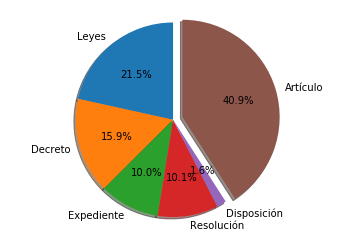

In [93]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Leyes', 'Decreto', 'Expediente', 'Resolución', 'Disposición', 'Artículo'
sizes = [21.55, 15.92, 10, 10.05, 1.58, 40.9]
explode = (0, 0, 0, 0, 0 ,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()